In [986]:
library(ggplot2)
library(dplyr)

In [3]:
# load lead variant results sc stages (iPS, mesendo, defendo)
leads.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/leads.csv", row.names = 1)
leads.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/leads.csv", row.names = 1)
leads.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/leads.csv", row.names = 1)

In [4]:
leads.ips.sign = leads.ips[leads.ips$global_corr_p_value < 0.1,]
leads.mes.sign = leads.mes[leads.mes$global_corr_p_value < 0.1,]
leads.defendo.sign = leads.defendo[leads.defendo$global_corr_p_value < 0.1,]

In [5]:
c(nrow(leads.ips.sign), nrow(leads.mes.sign), nrow(leads.defendo.sign))

[1] 1833 1702 1342

In [989]:
leads.ips.sign$stage = 'ips'
leads.mes.sign$stage = 'mesendo'
leads.defendo.sign$stage = 'defendo'

In [8]:
tail(leads.ips.sign,2)

,beta,beta_se,empirical_feature_p_value,p_value,snp_id,feature,global_corr_p_value,chrom,pos,ref_allele,...,permutation_0,permutation_1,permutation_2,permutation_3,permutation_4,permutation_5,permutation_6,permutation_7,permutation_8,permutation_9
1832,0.2633909,0.06878526,0.02294701,1.285729e-04,2_99216531_A_G,ENSG00000183513_COA5,0.09988874,2,99216531,A,...,0.1177149,0.2268341,0.04604055,0.08207479,0.06995593,0.2976581,0.9596449,0.1357771,0.6594468,0.3885136
1833,-0.2316972,0.05686095,0.02298146,4.605333e-05,22_45959540_G_A,ENSG00000077942_FBLN1,0.09998380,22,45959540,G,...,0.8539895,0.9376773,0.12443782,0.31213047,0.50813117,0.4217244,0.8211531,0.4448026,0.1754965,0.1965549


In [991]:
cols = c("snp_id","feature","stage","chrom","p_value")

In [992]:
all_leads = rbind(leads.ips.sign[,cols],
                 leads.mes.sign[,cols],
                 leads.defendo.sign[,cols])

In [993]:
nrow(all_leads)
head(all_leads)

[1] 4877

snp_id,feature,stage,chrom,p_value
5_149826526_C_T,ENSG00000164587_RPS14,ips,5,3.851118e-36
11_57283988_C_T,ENSG00000134809_TIMM10,ips,11,3.147553e-30
12_56401085_G_A,ENSG00000197728_RPS26,ips,12,9.762508e-30
17_79634162_T_G,ENSG00000214087_ARL16,ips,17,3.835702e-33
6_31486901_T_C,ENSG00000198563_DDX39B,ips,6,7.269794e-39
4_39446549_G_A,ENSG00000163682_RPL9,ips,4,2.553619e-46


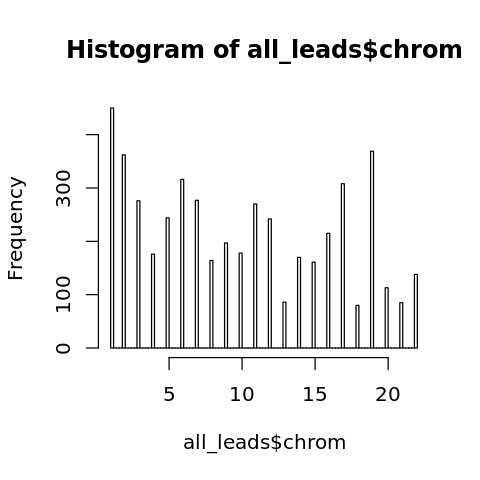

In [994]:
hist(all_leads$chrom, breaks = 80)

In [995]:
# filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/eqtl_allstages.tsv"

In [996]:
# write.table(all_leads, filename, sep = "\t", quote = F, row.names = F, col.names = T)

In [38]:
leads.ips.nonsign = leads.ips[leads.ips$global_corr_p_value > 0.2,]
leads.mes.nonsign = leads.mes[leads.mes$global_corr_p_value > 0.2,]
leads.defendo.nonsign = leads.defendo[leads.defendo$global_corr_p_value > 0.2,]

In [39]:
c(nrow(leads.ips.nonsign), nrow(leads.mes.nonsign), nrow(leads.defendo.nonsign))

[1] 8107 7900 8678

In [40]:
leads.ips.nonsign$stage = 'ips'
leads.mes.nonsign$stage = 'mesendo'
leads.defendo.nonsign$stage = 'defendo'

In [41]:
cols = c("snp_id","feature","stage","chrom","p_value")

In [42]:
non_leads = rbind(leads.ips.nonsign[,cols],
                 leads.mes.nonsign[,cols],
                 leads.defendo.nonsign[,cols])
nrow(non_leads)
non_leads = non_leads[sample(rownames(non_leads),5000),]
nrow(non_leads)

[1] 24685

[1] 5000

In [43]:
nrow(non_leads[non_leads$stage == "mesendo",])
# hist(non_leads$p_value)

[1] 1581

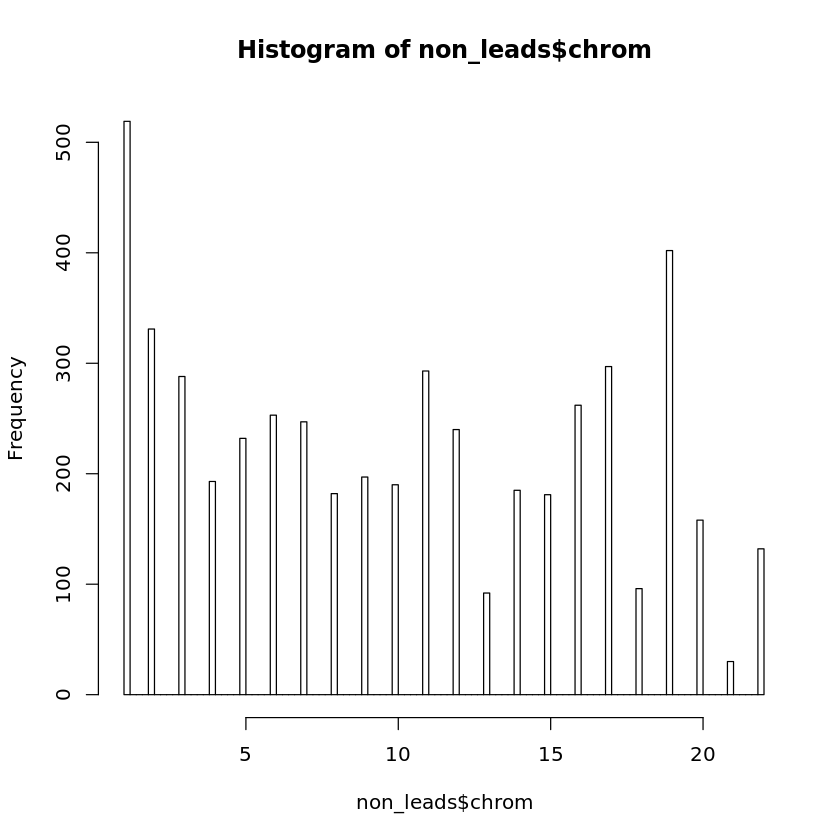

In [44]:
hist(non_leads$chrom, breaks = 80)

In [45]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/noneqtl_allstages.tsv"
write.table(non_leads, filename, sep = "\t", quote = F, row.names = F, col.names = T)

In [997]:
all_leads[all_leads$snp_id == '19_40840936_G_T',]

,snp_id,feature,stage,chrom,p_value
1551,19_40840936_G_T,ENSG00000197019_SERTAD1,ips,19,5.035257e-05


In [998]:
#########################

In [999]:
all_leads[all_leads$feature == 'ENSG00000005059_CCDC109B',]

,snp_id,feature,stage,chrom,p_value
1059,4_110425176_T_C,ENSG00000005059_CCDC109B,ips,4,6.740418e-05
2585,4_110648632_T_A,ENSG00000005059_CCDC109B,mesendo,4,3.132423e-05


In [1000]:
all_leads[all_leads$feature == 'ENSG00000002016_RAD52',]

,snp_id,feature,stage,chrom,p_value
1161,12_1058688_A_C,ENSG00000002016_RAD52,ips,12,8.035653e-06
2586,12_1021159_C_T,ENSG00000002016_RAD52,mesendo,12,2.261946e-05


In [1001]:
all_leads[all_leads$feature == 'ENSG00000100058_CRYBB2P1',]

,snp_id,feature,stage,chrom,p_value
34,22_25845855_C_G,ENSG00000100058_CRYBB2P1,ips,22,4.700473e-22
1954,22_25845855_C_G,ENSG00000100058_CRYBB2P1,mesendo,22,1.086693e-13
4644,22_25924999_G_A,ENSG00000100058_CRYBB2P1,defendo,22,4.194037e-04


In [1002]:
genes0 = unique(all_leads$feature)

In [1003]:
########################################################################
########################################################################

In [1004]:
###### see results

In [1008]:
file0 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/PCs/10pcs_endo_eqtl/summary_endo_eqtl.csv"

In [1009]:
df0 = read.csv(file0, row.names = 1)
nrow(df0)
head(df0)

[1] 4470

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,2.529784e-06,16_81118466_A_G,2.529784e-06
1,ENSG00000011523_CEP68,2,0.000000e+00,2_65279223_C_T,0.000000e+00
2,ENSG00000011523_CEP68,2,0.000000e+00,2_65290842_C_A,0.000000e+00
3,ENSG00000178814_OPLAH,1,1.644636e-02,8_145114924_G_C,1.644636e-02
4,ENSG00000013583_HEBP1,1,4.572872e-06,12_13154105_A_T,4.572872e-06
5,ENSG00000143942_CHAC2,1,1.687844e-06,2_54010876_C_A,1.687844e-06


In [1010]:
genes1 = unique(df0$gene)

In [1011]:
length(genes0[!(genes0 %in% genes1)])
genes0[!(genes0 %in% genes1)]

[1] 0

factor(0)
10788 Levels: ENSG00000000419_DPM1 ... ENSG00000272325_NUDT3

In [1012]:
unique(all_leads[!(all_leads$feature %in% genes1),"chrom"])

integer(0)

In [1013]:
all_leads[!(all_leads$feature %in% genes1) & all_leads$chrom == '17',]

snp_id,feature,stage,chrom,p_value


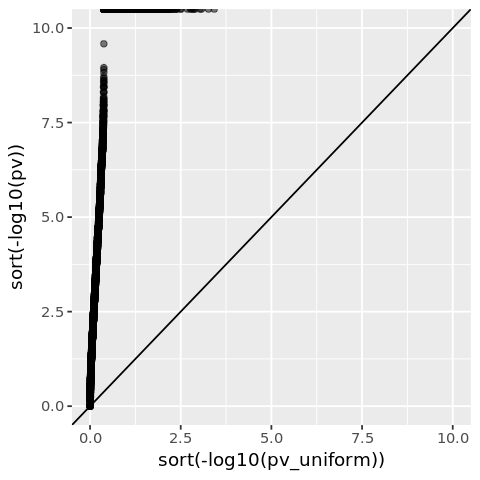

In [1014]:
df0$pv_uniform = runif(n = nrow(df0), min = 0, max = 1)
ggplot(df0, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + 
    geom_point(alpha = 0.5) + 
    geom_abline(intercept = 0) +
    xlim(c(0,10)) + ylim(c(0,10))

In [1015]:
head(all_leads,2)
head(df0,2)

snp_id,feature,stage,chrom,p_value
5_149826526_C_T,ENSG00000164587_RPS14,ips,5,3.851118e-36
11_57283988_C_T,ENSG00000134809_TIMM10,ips,11,3.147553e-30


,gene,n_snps,pv_raw,snpID,pv,pv_uniform
0,ENSG00000140905_GCSH,1,2.529784e-06,16_81118466_A_G,2.529784e-06,0.1804434
1,ENSG00000011523_CEP68,2,0.000000e+00,2_65279223_C_T,0.000000e+00,0.8842415


In [1016]:
pc10 = df0
colnames(pc10) <- c("feature","n_snps","p_value","snp_id","adj_p_value","unif_p_value")
df_pc10 = inner_join(all_leads,pc10, by = c("feature","snp_id"), suffix = c(".assoc",".int"))
head(df_pc10)

Warning message:
“Column `feature` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”

snp_id,feature,stage,chrom,p_value.assoc,n_snps,p_value.int,adj_p_value,unif_p_value
5_149826526_C_T,ENSG00000164587_RPS14,ips,5,3.851118e-36,1,0.000000e+00,0.000000e+00,0.16965821
11_57283988_C_T,ENSG00000134809_TIMM10,ips,11,3.147553e-30,1,0.000000e+00,0.000000e+00,0.03565938
12_56401085_G_A,ENSG00000197728_RPS26,ips,12,9.762508e-30,2,0.000000e+00,0.000000e+00,0.36687850
17_79634162_T_G,ENSG00000214087_ARL16,ips,17,3.835702e-33,2,0.000000e+00,0.000000e+00,0.61540490
6_31486901_T_C,ENSG00000198563_DDX39B,ips,6,7.269794e-39,2,4.624019e-06,9.248039e-06,0.94567946
4_39446549_G_A,ENSG00000163682_RPL9,ips,4,2.553619e-46,1,0.000000e+00,0.000000e+00,0.63672260


[1] 0.0435705

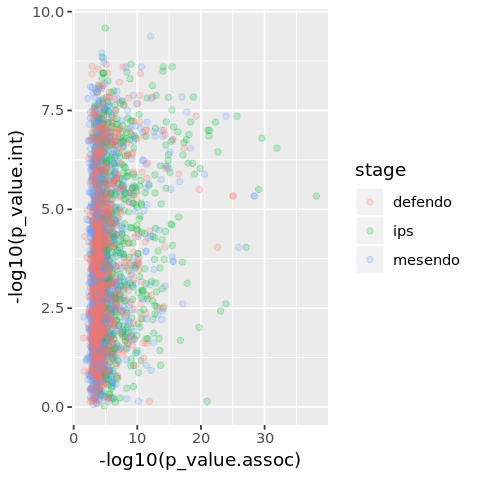

In [1017]:
cor(df_pc10$p_value.assoc, df_pc10$p_value.int)
ggplot(df_pc10[df_pc10$p_value.int > 0,], 
       aes(x = -log10(p_value.assoc), y = -log10(p_value.int), colour = stage)) + geom_point(alpha = 0.2)

In [1018]:
##### MOFA factors

In [1019]:
file1 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10mofa_factors_endo_eqtl/summary_endo_eqtl.csv"

In [1020]:
df1 = read.csv(file1, row.names = 1)
nrow(df1)
head(df1)

[1] 4470

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,0.000000e+00,16_81118466_A_G,0.000000e+00
1,ENSG00000011523_CEP68,2,0.000000e+00,2_65279223_C_T,0.000000e+00
2,ENSG00000011523_CEP68,2,0.000000e+00,2_65290842_C_A,0.000000e+00
3,ENSG00000178814_OPLAH,1,1.548251e-01,8_145114924_G_C,1.548251e-01
4,ENSG00000013583_HEBP1,1,4.235737e-03,12_13154105_A_T,4.235737e-03
5,ENSG00000143942_CHAC2,1,2.959063e-07,2_54010876_C_A,2.959063e-07


In [1021]:
df1 <- df1[-which(duplicated(df1$gene)),]
nrow(df1)
df1$qv = p.adjust(df1$pv, method = "BH")
nrow(df1[df1$qv<0.01,])
nrow(df1[df1$qv<0.01,])/nrow(df1)

[1] 3240

[1] 2624

[1] 0.8098765

In [1022]:
df1_sign = df1[df1$qv<0.01,]
df1_sign = df1_sign[order(df1_sign$qv, decreasing = T),]
head(df1_sign)

,gene,n_snps,pv_raw,snpID,pv,qv
2169,ENSG00000197019_SERTAD1,1,0.008098358,19_40840936_G_T,0.008098358,0.009999497
3679,ENSG00000160294_MCM3AP,2,0.004016900,21_47592990_C_T,0.008033800,0.009923565
4247,ENSG00000137275_RIPK1,1,0.008033447,6_3057126_A_C,0.008033447,0.009923565
1335,ENSG00000135537_LACE1,1,0.007998234,6_108853493_A_G,0.007998234,0.009887173
1580,ENSG00000256269_HMBS,2,0.003969154,11_118957357_G_A,0.007938308,0.009816839
2286,ENSG00000180346_TIGD2,1,0.007907396,4_90015925_G_T,0.007907396,0.009782346


In [1023]:
write.csv(df1_sign, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/10MOFA_fdr_1pct_results.csv", quote = F, row.names = F)

In [1024]:
file2 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10mofa_factors_endo_eqtl/summary_endo_eqtl_perms.csv"

In [1025]:
df2 = read.csv(file2, row.names = 1)
nrow(df2)
head(df2)

[1] 4470

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000198794_SCAMP5_perm0,3,0.3280774,15_75323648_C_G,0.9842321
1,ENSG00000198794_SCAMP5_perm0,3,0.5506401,15_75362084_C_T,1.0000000
2,ENSG00000198794_SCAMP5_perm0,3,0.2868172,15_75394517_C_T,0.8604516
3,ENSG00000187097_ENTPD5_perm0,1,0.6602042,14_74328905_G_T,0.6602042
4,ENSG00000184005_ST6GALNAC3_perm0,1,0.5413229,1_76520435_T_C,0.5413229
5,ENSG00000141562_NARF_perm0,1,0.3206436,17_80389438_C_T,0.3206436


In [1026]:
df2$gene = gsub("_perm0","",df2$gene)
df3 = inner_join(df1,df2,by = c("snpID","gene"),suffix = c("",".perm"))
nrow(df3)
head(df3)

Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”

[1] 3240

gene,n_snps,pv_raw,snpID,pv,qv,n_snps.perm,pv_raw.perm,pv.perm
ENSG00000140905_GCSH,1,0.000000e+00,16_81118466_A_G,0.000000e+00,0.000000e+00,1,0.1234870,0.1234870
ENSG00000011523_CEP68,2,0.000000e+00,2_65279223_C_T,0.000000e+00,0.000000e+00,2,0.8925204,1.0000000
ENSG00000178814_OPLAH,1,1.548251e-01,8_145114924_G_C,1.548251e-01,1.649357e-01,1,0.7630955,0.7630955
ENSG00000013583_HEBP1,1,4.235737e-03,12_13154105_A_T,4.235737e-03,5.450273e-03,1,0.1536144,0.1536144
ENSG00000143942_CHAC2,1,2.959063e-07,2_54010876_C_A,2.959063e-07,6.575696e-07,1,0.7406137,0.7406137
ENSG00000177150_FAM210A,2,1.829815e-07,18_13639218_C_T,3.659630e-07,8.011622e-07,2,0.5743922,1.0000000


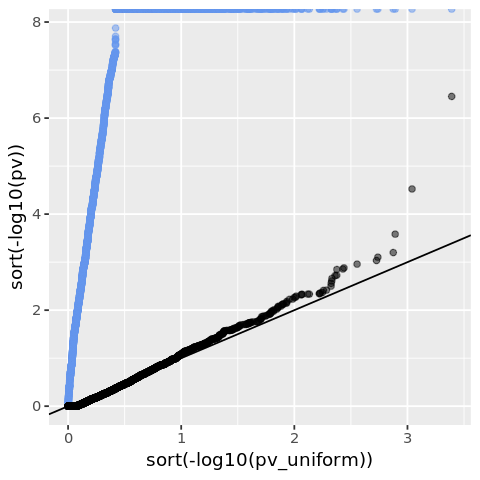

In [1027]:
df3$pv_uniform = runif(n = nrow(df3), min = 0, max = 1)
ggplot(df3, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + 
    geom_point(alpha = 0.5, col = "cornflowerblue") + 
    geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "black", alpha = 0.5) + 
    geom_abline(intercept = 0) #+
#     xlim(c(0,10)) + ylim(c(0,10))

In [1028]:
genes2 = unique(df1$gene)

In [1029]:
nrow(all_leads)
nrow(all_leads[!(all_leads$feature %in% genes2),])

[1] 4877

[1] 0

In [1030]:
chroms = unique(all_leads[!(all_leads$feature %in% genes2),"chrom"])
chroms[order(chroms)]

integer(0)

In [1031]:
nrow(all_leads[!(all_leads$feature %in% genes2) & all_leads$chrom == '1',])
nrow(all_leads[!(all_leads$feature %in% genes2) & all_leads$chrom == '2',])
nrow(all_leads[!(all_leads$feature %in% genes2) & all_leads$chrom == '12',])
nrow(all_leads[!(all_leads$feature %in% genes2) & all_leads$chrom == '13',])
nrow(all_leads[!(all_leads$feature %in% genes2) & all_leads$chrom == '14',])
nrow(all_leads[!(all_leads$feature %in% genes2) & all_leads$chrom == '15',])
nrow(all_leads[!(all_leads$feature %in% genes2) & all_leads$chrom == '16',])
nrow(all_leads[!(all_leads$feature %in% genes2) & all_leads$chrom == '17',])

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [1032]:
nrow(all_leads[!(all_leads$feature %in% genes2) & all_leads$chrom == '1',])
nrow(all_leads[!(all_leads$feature %in% genes2) & all_leads$chrom == '2',])
nrow(all_leads[!(all_leads$feature %in% genes2) & all_leads$chrom == '12',])
nrow(all_leads[!(all_leads$feature %in% genes2) & all_leads$chrom == '13',])
nrow(all_leads[!(all_leads$feature %in% genes2) & all_leads$chrom == '14',])
nrow(all_leads[!(all_leads$feature %in% genes2) & all_leads$chrom == '15',])
nrow(all_leads[!(all_leads$feature %in% genes2) & all_leads$chrom == '16',])
nrow(all_leads[!(all_leads$feature %in% genes2) & all_leads$chrom == '17',])

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [1033]:
df1$pv_uniform = runif(n = nrow(df1), min = 0, max = 1)
# ggplot(df1, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + 
#     geom_point(alpha = 0.5) + 
#     geom_abline(intercept = 0) +
#     xlim(c(0,10)) + ylim(c(0,10))

In [1034]:
df2 = inner_join(df0,df1,by = c("snpID","gene"),suffix = c(".pc",".mofa"))
head(df2)

gene,n_snps.pc,pv_raw.pc,snpID,pv.pc,pv_uniform.pc,n_snps.mofa,pv_raw.mofa,pv.mofa,qv,pv_uniform.mofa
ENSG00000140905_GCSH,1,2.529784e-06,16_81118466_A_G,2.529784e-06,0.1804434,1,0.000000e+00,0.000000e+00,0.000000e+00,0.7252917
ENSG00000011523_CEP68,2,0.000000e+00,2_65279223_C_T,0.000000e+00,0.8842415,2,0.000000e+00,0.000000e+00,0.000000e+00,0.9383833
ENSG00000178814_OPLAH,1,1.644636e-02,8_145114924_G_C,1.644636e-02,0.7839662,1,1.548251e-01,1.548251e-01,1.649357e-01,0.7330976
ENSG00000013583_HEBP1,1,4.572872e-06,12_13154105_A_T,4.572872e-06,0.4077220,1,4.235737e-03,4.235737e-03,5.450273e-03,0.2883804
ENSG00000143942_CHAC2,1,1.687844e-06,2_54010876_C_A,1.687844e-06,0.8550150,1,2.959063e-07,2.959063e-07,6.575696e-07,0.3437975
ENSG00000177150_FAM210A,2,1.291763e-07,18_13639218_C_T,2.583526e-07,0.9469168,2,1.829815e-07,3.659630e-07,8.011622e-07,0.3441784


[1] 0.4754981

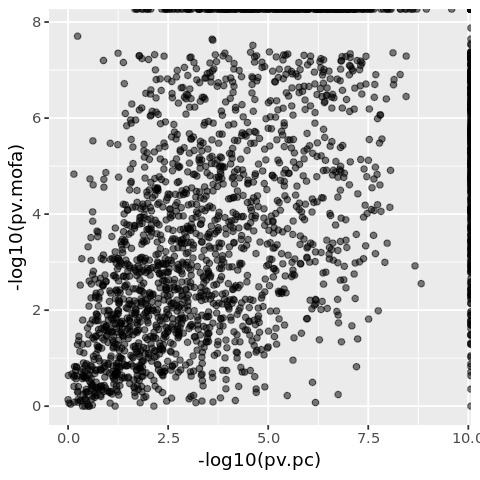

In [1035]:
cor(df2$pv.pc,df2$pv.mofa)
ggplot(df2, aes(x = -log10(pv.pc),y=-log10(pv.mofa))) + geom_point(alpha = 0.5)

In [1036]:
file3 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/1mofa_factor_endo_eqtl/summary_endo_eqtl.csv"

In [1037]:
df3 = read.csv(file3, row.names = 1)
nrow(df3)
head(df3)

[1] 4470

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,6.837740e-02,16_81118466_A_G,6.837740e-02
1,ENSG00000011523_CEP68,2,1.845857e-12,2_65279223_C_T,3.691714e-12
2,ENSG00000011523_CEP68,2,1.098719e-08,2_65290842_C_A,2.197438e-08
3,ENSG00000178814_OPLAH,1,3.414334e-01,8_145114924_G_C,3.414334e-01
4,ENSG00000013583_HEBP1,1,8.091490e-01,12_13154105_A_T,8.091490e-01
5,ENSG00000143942_CHAC2,1,3.760195e-01,2_54010876_C_A,3.760195e-01


In [1038]:
df3 <- df3[-which(duplicated(df3$gene)),]
nrow(df3)
df3$qv = p.adjust(df3$pv, method = "BH")
nrow(df3[df3$qv<0.01,])
nrow(df3[df3$qv<0.01,])/nrow(df3)

[1] 3240

[1] 1163

[1] 0.3589506

In [1039]:
file4 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/1mofa_factor_endo_eqtl/summary_endo_eqtl_perms.csv"

In [1040]:
df4 = read.csv(file4, row.names = 1)
nrow(df4)
head(df4)

[1] 4470

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000198794_SCAMP5_perm0,3,0.2106081,15_75323648_C_G,0.6318244
1,ENSG00000198794_SCAMP5_perm0,3,0.3177237,15_75362084_C_T,0.9531712
2,ENSG00000198794_SCAMP5_perm0,3,0.1681549,15_75394517_C_T,0.5044646
3,ENSG00000187097_ENTPD5_perm0,1,0.1634527,14_74328905_G_T,0.1634527
4,ENSG00000184005_ST6GALNAC3_perm0,1,0.2691486,1_76520435_T_C,0.2691486
5,ENSG00000141562_NARF_perm0,1,0.1423132,17_80389438_C_T,0.1423132


In [1041]:
df4$gene = gsub("_perm0","",df4$gene)
df5 = inner_join(df3,df4,by = c("snpID","gene"),suffix = c("",".perm"))
head(df5)

Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”

gene,n_snps,pv_raw,snpID,pv,qv,n_snps.perm,pv_raw.perm,pv.perm
ENSG00000140905_GCSH,1,6.837740e-02,16_81118466_A_G,6.837740e-02,1.263072e-01,1,0.7926554,0.7926554
ENSG00000011523_CEP68,2,1.845857e-12,2_65279223_C_T,3.691714e-12,4.381374e-11,2,0.7945174,1.0000000
ENSG00000178814_OPLAH,1,3.414334e-01,8_145114924_G_C,3.414334e-01,4.701421e-01,1,0.7580407,0.7580407
ENSG00000013583_HEBP1,1,8.091490e-01,12_13154105_A_T,8.091490e-01,9.073396e-01,1,0.3341606,0.3341606
ENSG00000143942_CHAC2,1,3.760195e-01,2_54010876_C_A,3.760195e-01,5.099637e-01,1,0.1090410,0.1090410
ENSG00000177150_FAM210A,2,3.253852e-01,18_13639218_C_T,6.507705e-01,7.751825e-01,2,0.6788353,1.0000000


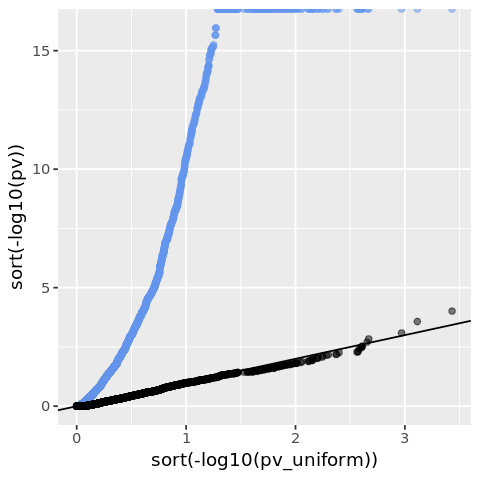

In [1042]:
df5$pv_uniform = runif(n = nrow(df5), min = 0, max = 1)
ggplot(df5, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + 
    geom_point(alpha = 0.5, col = "cornflowerblue") + 
    geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "black", alpha = 0.5) + 
    geom_abline(intercept = 0) #+
#     xlim(c(0,10)) + ylim(c(0,10))

In [1043]:
file5 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/2mofa_factors_endo_eqtl/summary_endo_eqtl.csv"

In [1044]:
df5 = read.csv(file5, row.names = 1)
nrow(df5)
head(df5)

[1] 4470

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,9.222614e-03,16_81118466_A_G,0.009222614
1,ENSG00000011523_CEP68,2,0.000000e+00,2_65279223_C_T,0.000000000
2,ENSG00000011523_CEP68,2,-2.126210e-09,2_65290842_C_A,0.000000000
3,ENSG00000178814_OPLAH,1,5.681901e-02,8_145114924_G_C,0.056819012
4,ENSG00000013583_HEBP1,1,1.000000e+00,12_13154105_A_T,1.000000000
5,ENSG00000143942_CHAC2,1,1.000000e+00,2_54010876_C_A,1.000000000


In [1045]:
df5 <- df5[-which(duplicated(df5$gene)),]
df5$qv = p.adjust(df5$pv, method = "BH")
nrow(df5)
nrow(df5[df5$qv<0.01,])
nrow(df5[df5$qv<0.01,])/nrow(df5)

[1] 3240

[1] 1445

[1] 0.4459877

In [1046]:
file6 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/2mofa_factors_endo_eqtl/summary_endo_eqtl_perms.csv"
df6 = read.csv(file6, row.names = 1)
nrow(df6)
head(df6)

[1] 4470

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000198794_SCAMP5_perm0,3,0.1096750,15_75323648_C_G,0.3290250
1,ENSG00000198794_SCAMP5_perm0,3,1.0000000,15_75362084_C_T,1.0000000
2,ENSG00000198794_SCAMP5_perm0,3,0.3318592,15_75394517_C_T,0.9955775
3,ENSG00000187097_ENTPD5_perm0,1,0.3481916,14_74328905_G_T,0.3481916
4,ENSG00000184005_ST6GALNAC3_perm0,1,0.3236042,1_76520435_T_C,0.3236042
5,ENSG00000141562_NARF_perm0,1,0.2724228,17_80389438_C_T,0.2724228


In [1047]:
df6$gene = gsub("_perm0","",df6$gene)
df7 = inner_join(df5,df6,by = c("snpID","gene"),suffix = c("",".perm"))
head(df7)

Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”

gene,n_snps,pv_raw,snpID,pv,qv,n_snps.perm,pv_raw.perm,pv.perm
ENSG00000140905_GCSH,1,0.009222614,16_81118466_A_G,0.009222614,0.01872260,1,1.00000,1.00000
ENSG00000011523_CEP68,2,0.000000000,2_65279223_C_T,0.000000000,0.00000000,2,1.00000,1.00000
ENSG00000178814_OPLAH,1,0.056819012,8_145114924_G_C,0.056819012,0.09302355,1,1.00000,1.00000
ENSG00000013583_HEBP1,1,1.000000000,12_13154105_A_T,1.000000000,1.00000000,1,1.00000,1.00000
ENSG00000143942_CHAC2,1,1.000000000,2_54010876_C_A,1.000000000,1.00000000,1,0.29793,0.29793
ENSG00000177150_FAM210A,2,0.407700563,18_13639218_C_T,0.815401127,0.92471111,2,1.00000,1.00000


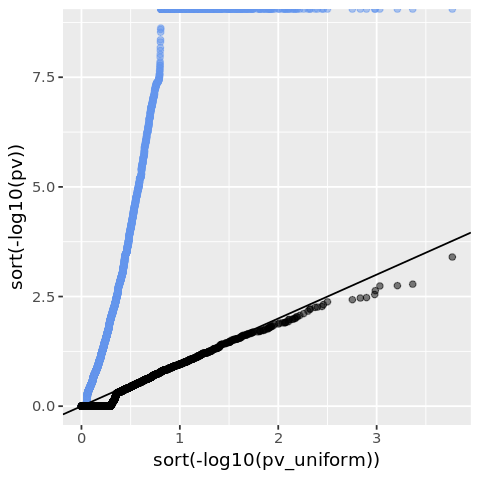

In [1048]:
df7$pv_uniform = runif(n = nrow(df7), min = 0, max = 1)
ggplot(df7, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + 
    geom_point(alpha = 0.5, col = "cornflowerblue") + 
    geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "black", alpha = 0.5) + 
    geom_abline(intercept = 0) #+
#     xlim(c(0,10)) + ylim(c(0,10))

In [1049]:
file7 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/5mofa_factors_endo_eqtl/summary_endo_eqtl.csv"
df7 = read.csv(file7, row.names = 1)
nrow(df7)
head(df7)

[1] 4470

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,3.108576e-06,16_81118466_A_G,3.108576e-06
1,ENSG00000011523_CEP68,2,0.000000e+00,2_65279223_C_T,0.000000e+00
2,ENSG00000011523_CEP68,2,0.000000e+00,2_65290842_C_A,0.000000e+00
3,ENSG00000178814_OPLAH,1,2.514053e-02,8_145114924_G_C,2.514053e-02
4,ENSG00000013583_HEBP1,1,5.947528e-02,12_13154105_A_T,5.947528e-02
5,ENSG00000143942_CHAC2,1,1.620319e-03,2_54010876_C_A,1.620319e-03


In [1050]:
df7 <- df7[-which(duplicated(df7$gene)),]
nrow(df7)
df7$qv = p.adjust(df7$pv, method = "BH")
nrow(df7[df7$qv<0.01,])
nrow(df7[df7$qv<0.01,])/nrow(df7)

[1] 3240

[1] 2280

[1] 0.7037037

In [1051]:
file8 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/5mofa_factors_endo_eqtl/summary_endo_eqtl_perms.csv"
df8 = read.csv(file8, row.names = 1)
nrow(df8)
head(df8)

[1] 4470

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000198794_SCAMP5_perm0,3,0.2133216,15_75323648_C_G,0.6399649
1,ENSG00000198794_SCAMP5_perm0,3,0.4986873,15_75362084_C_T,1.0000000
2,ENSG00000198794_SCAMP5_perm0,3,0.1587902,15_75394517_C_T,0.4763706
3,ENSG00000187097_ENTPD5_perm0,1,0.6603953,14_74328905_G_T,0.6603953
4,ENSG00000184005_ST6GALNAC3_perm0,1,0.2723872,1_76520435_T_C,0.2723872
5,ENSG00000141562_NARF_perm0,1,0.1381849,17_80389438_C_T,0.1381849


In [1052]:
df8$gene = gsub("_perm0","",df8$gene)
df9 = inner_join(df7,df8,by = c("snpID","gene"),suffix = c("",".perm"))
head(df9)

Warning message:
“Column `gene` joining factor and character vector, coercing into character vector”

gene,n_snps,pv_raw,snpID,pv,qv,n_snps.perm,pv_raw.perm,pv.perm
ENSG00000140905_GCSH,1,3.108576e-06,16_81118466_A_G,3.108576e-06,7.807587e-06,1,0.9110536,0.9110536
ENSG00000011523_CEP68,2,0.000000e+00,2_65279223_C_T,0.000000e+00,0.000000e+00,2,0.8419154,1.0000000
ENSG00000178814_OPLAH,1,2.514053e-02,8_145114924_G_C,2.514053e-02,3.264742e-02,1,0.9877479,0.9877479
ENSG00000013583_HEBP1,1,5.947528e-02,12_13154105_A_T,5.947528e-02,7.254131e-02,1,0.8321582,0.8321582
ENSG00000143942_CHAC2,1,1.620319e-03,2_54010876_C_A,1.620319e-03,2.583018e-03,1,0.5108967,0.5108967
ENSG00000177150_FAM210A,2,1.233495e-05,18_13639218_C_T,2.466990e-05,5.391202e-05,2,0.1583719,0.3167439


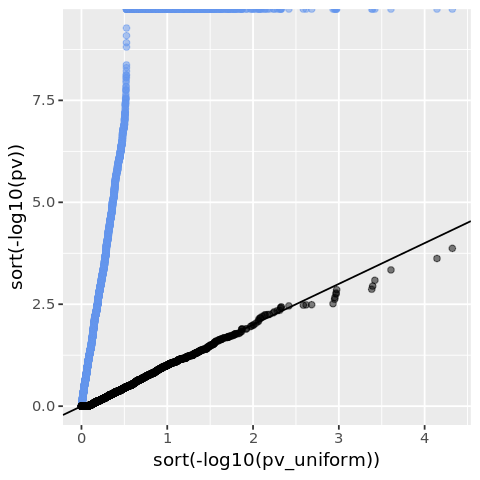

In [1053]:
df9$pv_uniform = runif(n = nrow(df9), min = 0, max = 1)
ggplot(df9, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv)))) + 
    geom_point(alpha = 0.5, col = "cornflowerblue") + 
    geom_point(aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv.perm))), col = "black", alpha = 0.5) + 
    geom_abline(intercept = 0) #+
#     xlim(c(0,10)) + ylim(c(0,10))

In [1054]:
############# filtering donors with < 50 cells

In [1055]:
file1 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10mofa_factors_endo_eqtl/summary_endo_eqtl.csv"
df1 = read.csv(file1, row.names = 1)
nrow(df1)
head(df1,2)

[1] 4470

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,0,16_81118466_A_G,0
1,ENSG00000011523_CEP68,2,0,2_65279223_C_T,0


In [1056]:
# df1 <- df1[-which(duplicated(df1$gene)),]
nrow(df1)
df1$qv = p.adjust(df1$pv, method = "BH")
# nrow(df1[df1$qv<0.01,])
nrow(df1[df1$qv<0.01,])/nrow(df1)

[1] 4470

[1] 0.8201342

In [1057]:
file2 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10mofa_factors_endo_eqtl_over50cell_donors/summary_endo_eqtl.csv"
df2 = read.csv(file2, row.names = 1)
nrow(df2)
head(df2,2)

[1] 4470

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,0,16_81118466_A_G,0
1,ENSG00000011523_CEP68,2,0,2_65279223_C_T,0


In [1058]:
# df2 <- df2[-which(duplicated(df2$gene)),]
nrow(df2)
df2$qv = p.adjust(df2$pv, method = "BH")
# nrow(df2[df2$qv<0.01,])
nrow(df2[df2$qv<0.01,])/nrow(df2)

[1] 4470

[1] 0.8102908

[1] 4470

[1] 0.9783207

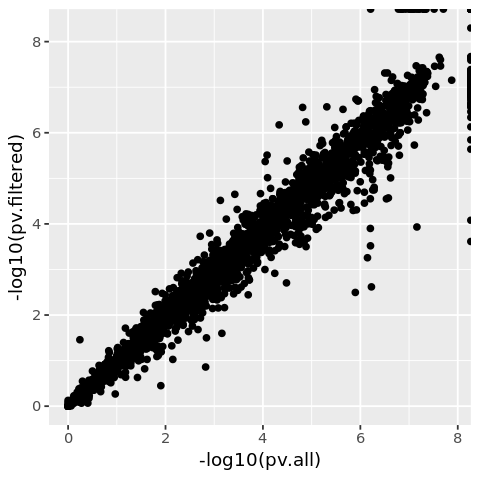

In [1059]:
df3 = inner_join(df1,df2, by = c("gene","n_snps","snpID"), suffix = c(".all",".filtered"))
nrow(df3)
cor(df3$pv.all, df3$pv.filtered)
ggplot(df3, aes(x = -log10(pv.all), y = -log10(pv.filtered))) + geom_point()

In [1060]:
############# filtering donors with < 100 cells

In [1061]:
file4 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10mofa_factors_endo_eqtl_over100cell_donors/summary_endo_eqtl.csv"
df4 = read.csv(file4, row.names = 1)
nrow(df4)
head(df4,2)

[1] 4470

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,0,16_81118466_A_G,0
1,ENSG00000011523_CEP68,2,0,2_65279223_C_T,0


In [1062]:
genes4 = unique(df4$gene)
chroms = unique(all_leads[!(all_leads$feature %in% genes4),"chrom"])
chroms[order(chroms)]

nrow(all_leads[!(all_leads$feature %in% genes4) & all_leads$chrom == '17',])

integer(0)

[1] 0

In [1063]:
# df4 <- df4[-which(duplicated(df4$gene)),]
nrow(df4)
df4$qv = p.adjust(df4$pv, method = "BH")
# nrow(df4[df4$qv<0.01,])
nrow(df4[df4$qv<0.01,])/nrow(df4)

[1] 4470

[1] 0.7832215

[1] 4470

[1] 0.6755611

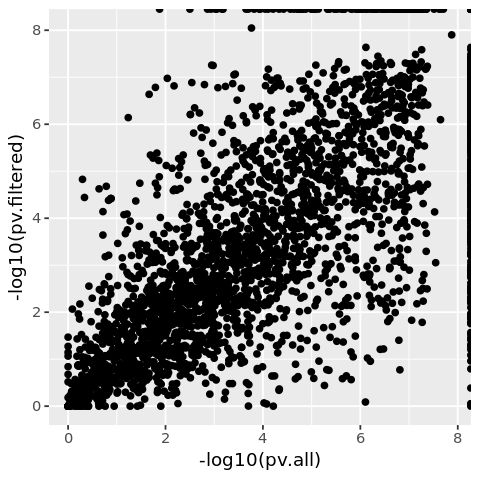

In [1064]:
df5 = inner_join(df1,df4, by = c("gene","n_snps","snpID"), suffix = c(".all",".filtered"))
nrow(df5)
cor(df5$pv.all, df5$pv.filtered)
ggplot(df5, aes(x = -log10(pv.all), y = -log10(pv.filtered))) + geom_point()

[1] 4470

[1] 0.7119667

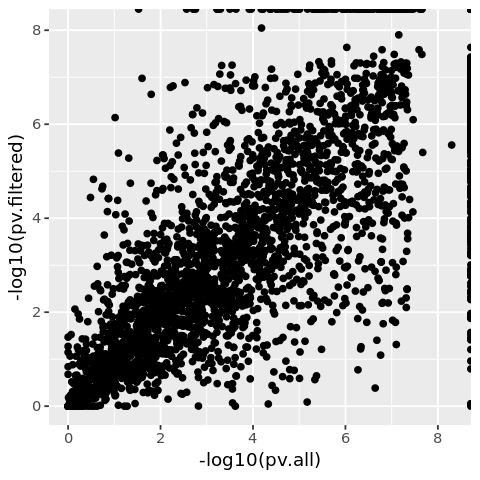

In [1065]:
df6 = inner_join(df2,df4, by = c("gene","n_snps","snpID"), suffix = c(".all",".filtered"))
nrow(df6)
cor(df6$pv.all, df6$pv.filtered)
ggplot(df6, aes(x = -log10(pv.all), y = -log10(pv.filtered))) + geom_point()

In [1066]:
##### adding covariates for library size

In [1067]:
file1 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10mofa_factors_endo_eqtl/summary_endo_eqtl.csv"
df1 = read.csv(file1, row.names = 1)
nrow(df1)
head(df1,2)

[1] 4470

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,0,16_81118466_A_G,0
1,ENSG00000011523_CEP68,2,0,2_65279223_C_T,0


In [1068]:
file7 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10mofa_factors_endo_eqtl_covs/summary_endo_eqtl.csv"
df7 = read.csv(file7, row.names = 1)
nrow(df7)
head(df7,2)

[1] 4470

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,0,16_81118466_A_G,0
1,ENSG00000011523_CEP68,2,0,2_65279223_C_T,0


In [1069]:
# df7 <- df7[-which(duplicated(df7$gene)),]
nrow(df7)
df7$qv = p.adjust(df7$pv, method = "BH")
# nrow(df7[df7$qv<0.01,])
nrow(df7[df7$qv<0.01,])/nrow(df7)

[1] 4470

[1] 0.8201342

In [1070]:
genes7 = unique(df7$gene)
chroms = unique(all_leads[!(all_leads$feature %in% genes7),"chrom"])
chroms[order(chroms)]

integer(0)

In [1071]:
nrow(all_leads[!(all_leads$feature %in% genes7) & all_leads$chrom == '6',])

[1] 0

[1] 4470

[1] 0.9993152

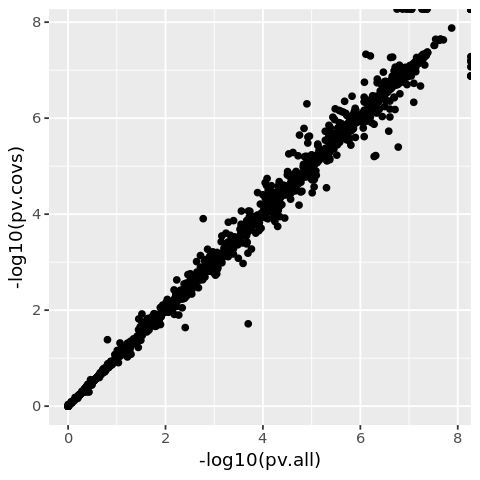

In [1072]:
df8 = inner_join(df1,df7, by = c("gene","n_snps","snpID"), suffix = c(".all",".covs"))
nrow(df8)
cor(df8$pv.all, df8$pv.covs)
ggplot(df8, aes(x = -log10(pv.all), y = -log10(pv.covs))) + geom_point()

In [1073]:
##### FE test

In [1074]:
file9 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10mofa_factors_endo_eqtl_fe/summary_endo_eqtl.csv"
df9 = read.csv(file9, row.names = 1)
nrow(df9)
head(df9,2)

[1] 820

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000189306_RRP7A,3,8.469218e-06,22_42896474_T_C,2.540765e-05
1,ENSG00000189306_RRP7A,3,2.418442e-06,22_42897414_A_C,7.255326e-06


In [1075]:
df9 <- df9[-which(duplicated(df9$gene)),]
nrow(df9)
df9$qv = p.adjust(df9$pv, method = "BH")
nrow(df9[df9$qv<0.01,])
nrow(df9[df9$qv<0.01,])/nrow(df9)

[1] 394

[1] 311

[1] 0.7893401

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

[1] 394

[1] 0.1981158

Warning message:
“Removed 146 rows containing missing values (geom_point).”

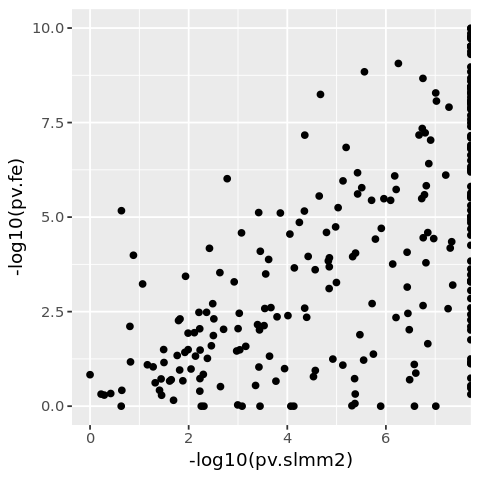

In [1076]:
df10 = inner_join(df1,df9, by = c("gene","n_snps","snpID"), suffix = c(".slmm2",".fe"))
nrow(df10)
cor(df10$pv.slmm2, df10$pv.fe)
ggplot(df10, aes(x = -log10(pv.slmm2), y = -log10(pv.fe))) + geom_point() + ylim(c(0,10))

In [843]:
file1 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10mofa_factors_endo_eqtl/summary_endo_eqtl.csv"
df1 = read.csv(file1, row.names = 1)
nrow(df1)
head(df1,2)

[1] 4470

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000140905_GCSH,1,0,16_81118466_A_G,0
1,ENSG00000011523_CEP68,2,0,2_65279223_C_T,0


In [844]:
df1 <- df1[-which(duplicated(df1$gene)),]
nrow(df1)
df1$qv = p.adjust(df1$pv, method = "BH")

[1] 3240

In [845]:
df1 = df1[df1$qv < 0.1,]
df1$eqtl = paste0(df1$gene,"-",df1$snpID)

In [846]:
n = 200
df1_top = head(df1[order(df1$qv),],n)
df1_bottom = head(df1[order(df1$qv, decreasing = T),],n)

In [847]:
file0 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10mofa_factors_endo_eqtl_bootstrap/summary_endo_eqtl.csv"
df0 = read.csv(file0, row.names = 1)
nrow(df0)
head(df0,2)

[1] 12061

,gene,bootstrap_idx,n_snps,pv_raw,snpID,pv
0,ENSG00000177663_IL17RA,3,1,9.187751e-05,22_17591089_G_A,9.187751e-05
1,ENSG00000100058_CRYBB2P1,71,2,0.000000e+00,22_25845855_C_G,0.000000e+00


In [848]:
unique(df0$bootstrap_idx)[order(unique(df0$bootstrap_idx))]
length(unique(unique(df0$gene)))

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 [26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 [51] 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 [76] 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99

[1] 88

In [849]:
df0$eqtl = paste0(df0$gene,"-",df0$snpID)

In [850]:
df0_top = df0[df0$eqtl %in% df1_top$eqtl,]
df0_bottom = df0[df0$eqtl %in% df1_bottom$eqtl,]

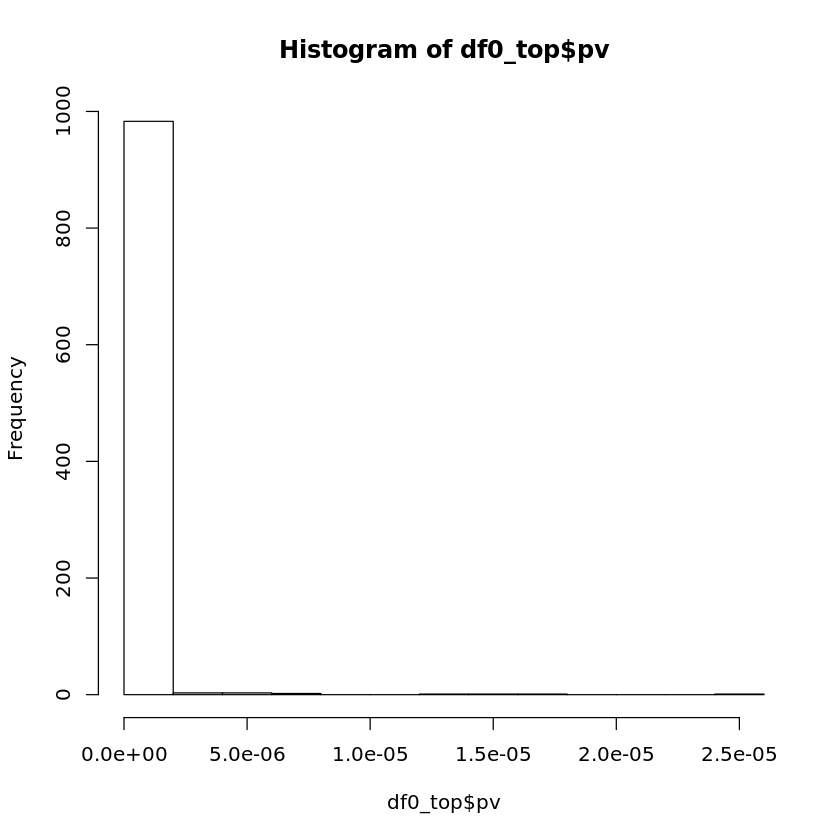

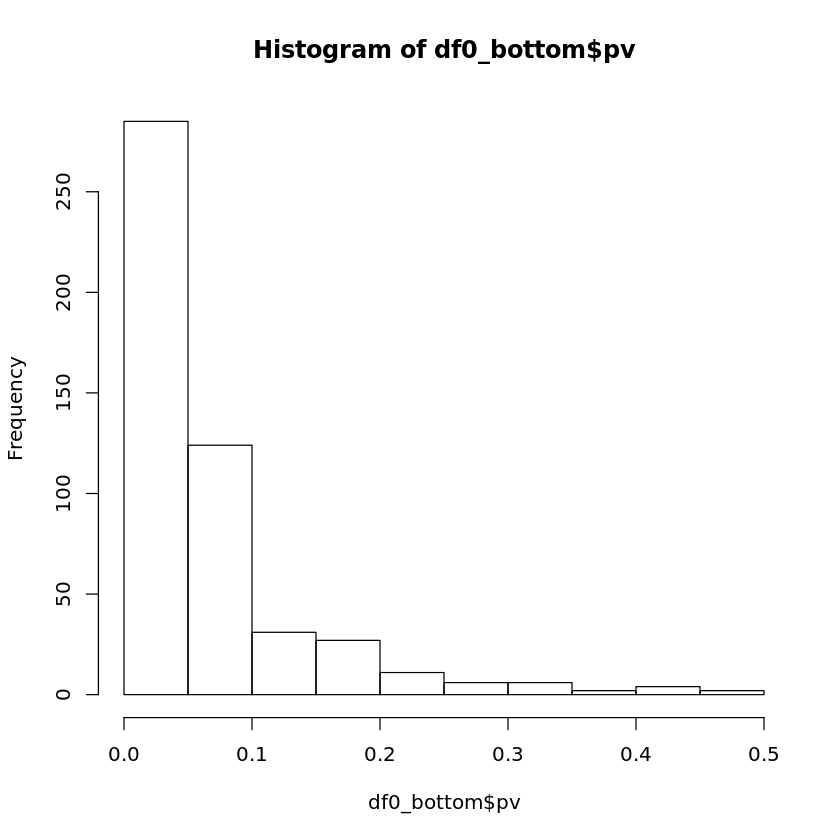

In [851]:
hist(df0_top$pv)
hist(df0_bottom$pv)

In [901]:
nrow(df0)
# head(df1)
df_all = inner_join(df0,df1[,c("eqtl","qv")], by = "eqtl")
nrow(df_all)

[1] 12061

[1] 8068

In [902]:
# head(df_all,2)
# df_all = df_all[order(df_all$qv),]
tail(df_all,2)

,gene,bootstrap_idx,n_snps,pv_raw,snpID,pv,eqtl,qv
8067,ENSG00000189060_H1F0,83,1,0.00000000,22_38200124_C_T,0.00000000,ENSG00000189060_H1F0-22_38200124_C_T,0.00000000
8068,ENSG00000100422_CERK,54,3,0.01569277,22_47066294_T_C,0.04707832,ENSG00000100422_CERK-22_47066294_T_C,0.02623638


In [911]:
library(ggbeeswarm)
library(viridis)

Loading required package: viridisLite


In [912]:
# df_all = df_all[df_all$pv > 0,]
eqtls = unique(df_all$eqtl)
sample_eqtls = head(eqtls,30)
df_plot = df_all[df_all$eqtl %in% sample_eqtls,]
df_plot = df_plot[order(df_plot$qv),]
df_plot$idx = order(df_plot$eqtl)

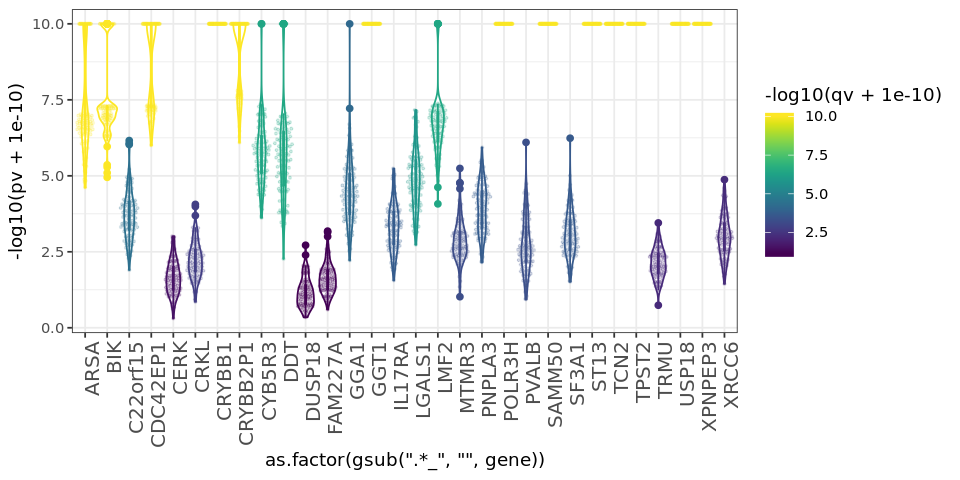

In [917]:
options(repr.plot.width = 8, repr.plot.height = 4) 
ggplot(df_plot, aes(x = as.factor(gsub(".*_","",gene)), y = -log10(pv+1e-10), colour = -log10(qv+1e-10))) + 
    geom_violin() + geom_boxplot(width=0.05) + geom_quasirandom(alpha = 0.2, size = 0.5) +
    theme_bw() + theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12)) + scale_color_viridis(option = "D")

In [978]:
file0 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10mofa_factors_endo_eqtl_normE/summary_endo_eqtl.csv"
file0 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10mofa_factors_endo_eqtl_gaussE/summary_endo_eqtl.csv"
file0 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10mofa_factors_endo_eqtl_downsample50/summary_endo_eqtl.csv"
file0 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/10mofa_factors_endo_eqtl_downsample100/summary_endo_eqtl.csv"


df0 = read.csv(file0, row.names = 1)
nrow(df0)
head(df0,2)

[1] 121

,gene,n_snps,pv_raw,snpID,pv
0,ENSG00000189306_RRP7A,3,0.0008132474,22_42896474_T_C,0.002439742
1,ENSG00000189306_RRP7A,3,0.0037480761,22_42897414_A_C,0.011244228


In [979]:
df0 <- df0[-which(duplicated(df0$gene)),]
nrow(df0)
df0$qv = p.adjust(df0$pv, method = "BH")
nrow(df0[df0$qv<0.01,])
nrow(df0[df0$qv<0.01,])/nrow(df0)

[1] 88

[1] 51

[1] 0.5795455

In [980]:
df_merge = inner_join(df1,df0, by = c("gene","snpID","n_snps"), suffix = c(".E",".normE"))
head(df_merge,2)

Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”

gene,n_snps,pv_raw.E,snpID,pv.E,qv.E,eqtl,idx,pv_raw.normE,pv.normE,qv.normE
ENSG00000189306_RRP7A,3,5.344311e-06,22_42896474_T_C,1.603293e-05,2.860501e-05,ENSG00000189306_RRP7A-22_42896474_T_C,1816.0,0.0008132474,0.002439742,0.004568028
ENSG00000196236_XPNPEP3,2,0.000000e+00,22_41256802_A_G,0.000000e+00,0.000000e+00,ENSG00000196236_XPNPEP3-22_41256802_A_G,621.5,0.0000000000,0.000000000,0.000000000


[1] 0.04041037

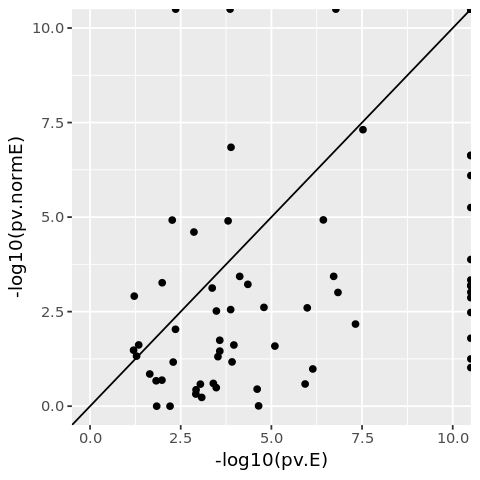

In [981]:
options(repr.plot.width = 4, repr.plot.height = 4) 
cor(df_merge$pv.E, df_merge$pv.normE)
ggplot(df_merge, aes(x = -log10(pv.E), y = -log10(pv.normE))) + geom_point() + 
       geom_abline(slope = 1) +xlim(c(0,10)) + ylim(c(0,10))
